# KNN

In [ ]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from collections import Counter

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
def distance(x1,x2,y1,y2):
    dif1 = euclidean_distance(x1,x2)
    dif2 = euclidean_distance(y1,y2)
    return dif1+dif2

In [ ]:
def minorDist(vet,neighborns):
  arrayDist = [0 for x in range(neighborns)]
  arrayDist.clear()
  vet.sort()
  for i in range(neighborns):
    arrayDist.append(vet[i])
  return arrayDist

In [ ]:
def indexDist(arrayDist,minorDist,neighborns):
  array = [0 for x in range(neighborns)]
  array.clear()
  for j in range(len(minorDist)):
    for y in range(len(arrayDist)):
      if(arrayDist[y]==minorDist[j]):
        array.append(y)
  return array

In [ ]:
def knn(neighborns,size,xs,xy):
  arrayDist = [0 for x in range(size)]
  arrayIndex = [0 for x in range(size)]
  arrayDist.clear()
  arrayIndex.clear()
  for i in range(size):
    for y in range(size):
      dist = distance(xs[i],xs[y],ys[i],ys[y])
      if(i==y):
        dist= 9999
      arrayDist.append(dist)
    auxArrayDist = arrayDist[:]
    mD= minorDist(arrayDist,neighborns)
    print("As distancias sao ",auxArrayDist)
    print("As menores distancias sao ", mD)
    iD = indexDist(auxArrayDist,mD,neighborns)
    print("Os indices proximos sao ",iD)
    arrayDist.clear()


In [ ]:
def singleKNN(neighborns,size,xs,ys,j):
  arrayDist = [0 for x in range(size)]
  arrayIndex = [0 for x in range(size)]
  array = [0 for x in range(size)]
  arrayDist.clear()
  arrayIndex.clear()
  array.clear()
  for i in range(size):
    dist = distance(xs[j],xs[i],ys[j],ys[i])
    if(i==j):
      dist= 9999
    arrayDist.append(dist)
  auxArrayDist = arrayDist[:]
  mD= minorDist(arrayDist,neighborns)
  iD = indexDist(auxArrayDist,mD,neighborns)
  array.append(auxArrayDist)
  array.append(mD)
  array.append(iD)
  return array

In [ ]:
size = 5
neighborns = 2
xs = np.random.random_sample((size,))
ys = np.random.random_sample((size,))

In [ ]:
xs

array([0.58549685, 0.34543321, 0.00918593, 0.212985  , 0.1188605 ])

In [ ]:
ys

array([0.25231574, 0.01689399, 0.12082481, 0.90190889, 0.31316599])

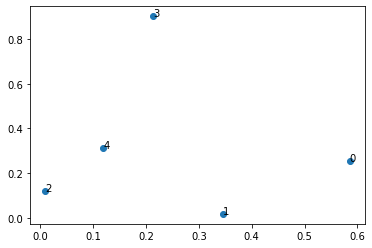

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.scatter(xs,ys)
n = [0,1,2,3,4]
for i, txt in enumerate(n):
    plt.annotate(txt, (xs[i], ys[i]))
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
knn(neighborns,size,xs,ys)

As distancias sao  [9999, 0.4754853872379754, 0.7078018477916994, 1.022104992388047, 0.527486586001563]
As menores distancias sao  [0.4754853872379754, 0.527486586001563]
Os indices proximos sao  [1, 4]
As distancias sao  [0.4754853872379754, 9999, 0.44017810778611044, 1.0174631119184738, 0.5228447055319896]
As menores distancias sao  [0.44017810778611044, 0.4754853872379754]
Os indices proximos sao  [2, 0]
As distancias sao  [0.7078018477916994, 0.44017810778611044, 9999, 0.9848831515027116, 0.302015747455221]
As menores distancias sao  [0.302015747455221, 0.44017810778611044]
Os indices proximos sao  [4, 1]
As distancias sao  [1.022104992388047, 1.0174631119184738, 0.9848831515027116, 9999, 0.6828674040474906]
As menores distancias sao  [0.6828674040474906, 0.9848831515027116]
Os indices proximos sao  [4, 2]
As distancias sao  [0.527486586001563, 0.5228447055319896, 0.302015747455221, 0.6828674040474906, 9999]
As menores distancias sao  [0.302015747455221, 0.5228447055319896]
Os indi

In [ ]:
def flatten(input):
    new_list = []
    for i in input:
        for j in i:
            new_list.append(j)
    return new_list

In [ ]:
array = singleKNN(neighborns,size,xs,ys,0)

In [ ]:
array = flatten(array)

In [ ]:
array

[9999,
 0.4754853872379754,
 0.7078018477916994,
 1.022104992388047,
 0.527486586001563,
 0.4754853872379754,
 0.527486586001563,
 1,
 4]

# KL Divergence

In [ ]:
import math
from scipy.stats import binom
from numpy import random
import seaborn as sns
from math import log2

In [ ]:
N=50
interval = 10

In [ ]:
sortedNumbers = np.random.randint(interval, size=N)
sortedNumbers

array([3, 2, 3, 7, 4, 0, 9, 9, 8, 0, 1, 7, 9, 1, 6, 9, 3, 1, 9, 3, 1, 8,
       4, 1, 5, 1, 8, 2, 4, 8, 5, 7, 2, 9, 8, 1, 6, 7, 5, 2, 5, 9, 4, 3,
       7, 2, 9, 9, 1, 2])

In [ ]:
columns = ["0","1","2","3","4","5","6","7","8","9"]
columns

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
def sumRepeatNumbers(array, size):
  totalSum = [0 for x in range(size)]
  for i in range(len(array)):
    totalSum[array[i]] = totalSum[array[i]]+1
  return totalSum

In [ ]:
def sumNumber(array, size):
  totalSum = 0
  for i in range(len(array)):
    totalSum = totalSum + array[i]
  return totalSum

In [ ]:
uniformD = [1/interval for x in range(interval)]

In [ ]:
vet = sumRepeatNumbers(sortedNumbers,interval)
vet

[2, 8, 6, 5, 4, 4, 2, 5, 5, 9]

In [ ]:
prob =  [(vet[x]/N)*x for x in range(interval)]
prob

[0.0,
 0.16,
 0.24,
 0.30000000000000004,
 0.32,
 0.4,
 0.24,
 0.7000000000000001,
 0.8,
 1.6199999999999999]

In [ ]:
sumProb = sumNumber(prob,interval)

In [ ]:
p = sumProb/(interval)
p

0.47800000000000004

In [ ]:
binomialD = [binom.rvs(interval,p) for x in range(interval)]

In [ ]:
binomialD

[4, 4, 5, 7, 5, 4, 5, 6, 5, 5]

<BarContainer object of 10 artists>

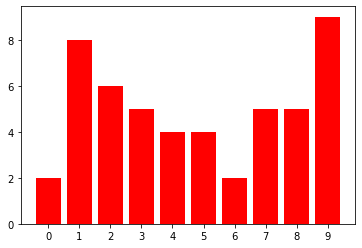

In [ ]:
plt.bar(columns, vet, color="red")

<BarContainer object of 10 artists>

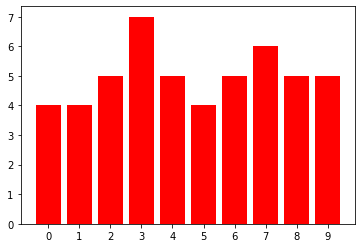

In [ ]:
plt.bar(columns, binomialD, color="red")

<BarContainer object of 10 artists>

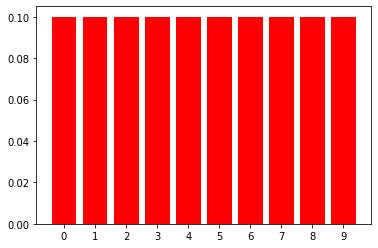

In [ ]:
plt.bar(columns, uniformD, color="red")

In [ ]:
def klDivergence(p,q):
  return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [ ]:
klDivergence(vet,binomialD)

7.536303859652962

In [ ]:
klDivergence(vet,uniformD)

288.96442618498634